<a href="https://colab.research.google.com/github/Shahwaiz9/Final_Year_Project/blob/main/CNNFYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Path to the zip file on Google Drive
zip_path = '/content/drive/MyDrive/FypDataSetPlantVillage/Tomato.zip'

# Directory to unzip the dataset
unzip_dir = '/content/dataset'

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Dataset unzipped successfully!")


Dataset unzipped successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset directory
dataset_dir = '/content/dataset/Tomato/'

# Check the number of subfolders in the Tomato directory (i.e., different disease categories)
subfolders = os.listdir(dataset_dir)
print(f"Found {len(subfolders)} disease categories in the dataset directory.")

# Check if each subfolder contains images
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.isdir(subfolder_path):
        images_in_subfolder = len(os.listdir(subfolder_path))
        print(f"Folder '{subfolder}' contains {images_in_subfolder} images.")

# Image dimensions and batch size
img_height, img_width = 128, 128
batch_size = 32

# Data generators with rescaling and split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=15,  # Reduced rotation range
    width_shift_range=0.1,  # Reduced width shift
    height_shift_range=0.1,  # Reduced height shift
    shear_range=0.1,  # Reduced shear
    zoom_range=0.1,  # Reduced zoom
    horizontal_flip=True,
    fill_mode='nearest'
)
# Train generator
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Display class labels and indices
class_labels = train_generator.class_indices
print("Class Labels and Indices:", class_labels)

# Check if the data is split correctly and labels are assigned
print(f"Training data has {train_generator.samples} samples and {train_generator.num_classes} classes.")
print(f"Validation data has {validation_generator.samples} samples and {validation_generator.num_classes} classes.")


Found 10 disease categories in the dataset directory.
Folder 'Tomato_Bacterial_spot' contains 2127 images.
Folder 'Tomato__Tomato_YellowLeaf__Curl_Virus' contains 3209 images.
Folder 'Tomato_healthy' contains 1591 images.
Folder 'Tomato__Tomato_mosaic_virus' contains 373 images.
Folder 'Tomato__Target_Spot' contains 1404 images.
Folder 'Tomato_Late_blight' contains 1909 images.
Folder 'Tomato_Spider_mites_Two_spotted_spider_mite' contains 1676 images.
Folder 'Tomato_Early_blight' contains 1000 images.
Folder 'Tomato_Septoria_leaf_spot' contains 1771 images.
Folder 'Tomato_Leaf_Mold' contains 952 images.
Found 11212 images belonging to 10 classes.
Found 4799 images belonging to 10 classes.
Class Labels and Indices: {'Tomato_Bacterial_spot': 0, 'Tomato_Early_blight': 1, 'Tomato_Late_blight': 2, 'Tomato_Leaf_Mold': 3, 'Tomato_Septoria_leaf_spot': 4, 'Tomato_Spider_mites_Two_spotted_spider_mite': 5, 'Tomato__Target_Spot': 6, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7, 'Tomato__Tomato_mosai

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')  # Output layer with number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 234ms/step - accuracy: 0.3276 - loss: 1.8927 - val_accuracy: 0.6228 - val_loss: 1.0609
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 137s 222ms/step - accuracy: 0.6277 - loss: 1.0767 - val_accuracy: 0.7537 - val_loss: 0.6718
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 83s 224ms/step - accuracy: 0.7125 - loss: 0.8117 - val_accuracy: 0.8018 - val_loss: 0.5495
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 230ms/step - accuracy: 0.7727 - loss: 0.6659 - val_accuracy: 0.8541 - val_loss: 0.4276
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 99s 279ms/step - accuracy: 0.7850 - loss: 0.6109 - val_accuracy: 0.8562 - val_loss: 0.3970
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 124s 228ms/step - accuracy: 0.8136 - loss: 0.5470 - val_accuracy: 0.8543 - val_loss: 0.4408
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 83s 230ms/step - accuracy: 0.8218 - loss: 0.5179 - val_accuracy: 0.8954 - val_loss: 0.3010
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 230ms/step - accuracy: 0.8352 - loss: 0.4671 - v

In [ ]:
# Evaluate on validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - accuracy: 0.9107 - loss: 0.2618
Validation Loss: 0.2610570192337036
Validation Accuracy: 0.9070639610290527


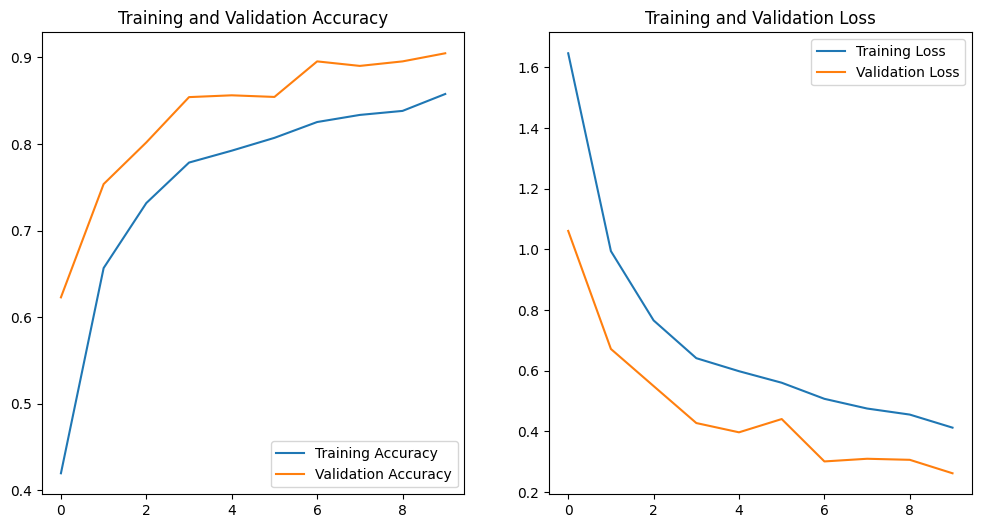

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` is defined from your training process

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the actual number of epochs from the history object
epochs_range = range(len(acc)) # This fixes the mismatch in lengths

plt.figure(figsize=(12, 6))
# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step
Number of misclassified images: 4232


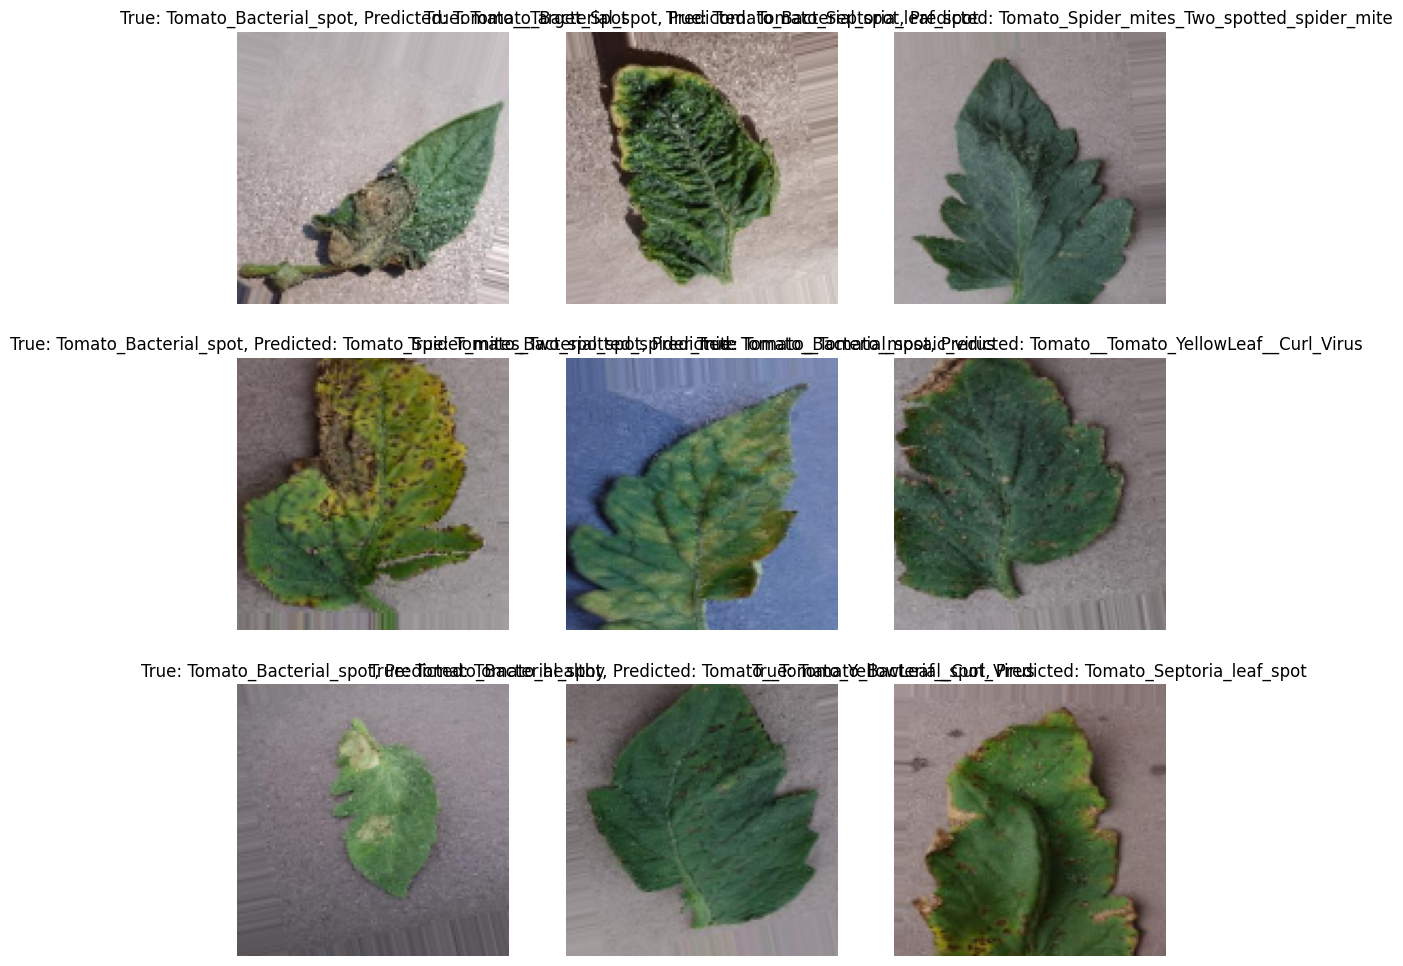

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy library and assign it to alias np

validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Find misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]

print(f"Number of misclassified images: {len(misclassified_indices)}")

# Display a few misclassified images
plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:9]):
    img, label = validation_generator[idx]  # Correctly unpack the image and label
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])  # img[0] is used to display the first image in the batch
    plt.title(f"True: {class_labels[true_classes[idx]]}, Predicted: {class_labels[predicted_classes[idx]]}")
    plt.axis('off')
plt.show()
